In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

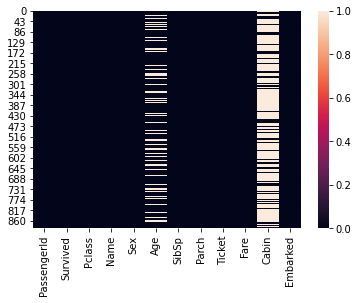

In [4]:
sns.heatmap(df.isnull())

## Handling null values

In [5]:
df.drop('Cabin', axis = 1, inplace = True)
df['Age'].fillna(value = 1, inplace = True)
df['Embarked'].fillna(value = df['Embarked'].mode().sum(), inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# One hot encoding

In [6]:
# For Sex
dummies = pd.get_dummies(df['Sex'])
dummies.drop('female', axis = 1, inplace = True)
df = pd.concat([df.drop('Sex', axis = 1), dummies], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,1,2,W./C. 6607,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,1


In [7]:
# For Embarked
dummies = pd.get_dummies(df['Embarked'])
dummies.drop('Q', axis = 1, inplace = True)
df = pd.concat([df.drop('Embarked', axis = 1), dummies], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,C,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,1,0


In [8]:
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Balancing the Data

In [10]:
df_class0 = df[df['Survived'] == 0]
df_class1 = df[df['Survived'] == 1]

In [11]:
oversampled_1s = df_class1.sample(207, replace = True)
df_before_updating = df
df = pd.concat([df, oversampled_1s], axis = 0)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size = 0.25, random_state = 101)

# Training

### Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rand_for = RandomForestClassifier(random_state = 101)
rand_for.fit(X_train, y_train)
print(classification_report(y_val, rand_for.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       134
           1       0.85      0.87      0.86       141

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.86      0.86      0.86       275



Text(0, 0.5, 'f1-score')

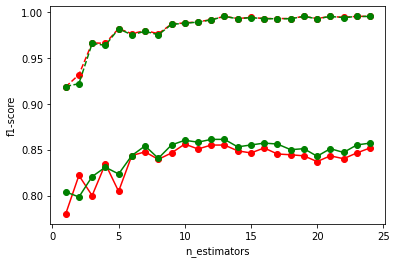

In [14]:
# Tuning n_estimators
k = 25
step = 1
scores_val_0 = []
scores_val_1 = []
scores_train_0 = []
scores_train_1 = []

for i in range(1,k,step):
    rand_for = RandomForestClassifier(n_estimators = i, random_state = 101)
    rand_for.fit(X_train, y_train)
    scores_val_0.append(classification_report(y_val, rand_for.predict(X_val), output_dict = True)['0']['f1-score'])
    scores_val_1.append(classification_report(y_val, rand_for.predict(X_val), output_dict = True)['1']['f1-score'])
    scores_train_0.append(classification_report(y_train, rand_for.predict(X_train), output_dict = True)['0']['f1-score'])
    scores_train_1.append(classification_report(y_train, rand_for.predict(X_train), output_dict = True)['1']['f1-score'])
    
plt.plot(list(range(1,k,step)), scores_val_0, 'r-o', label = 'val_0')
plt.plot(list(range(1,k,step)), scores_val_1, 'g-o', label = 'val_1')
plt.plot(list(range(1,k,step)), scores_train_0, 'r--o', label = 'train_0')
plt.plot(list(range(1,k,step)), scores_train_1, 'g--o', label = 'train_1')
plt.xlabel('n_estimators')
plt.ylabel('f1-score')
# n_estimators = 19

Text(0, 0.5, 'f1-score')

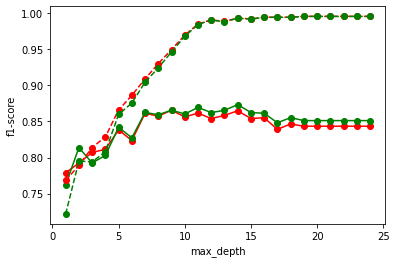

In [15]:
# Tuning max_depth
k = 25
step = 1
scores_val_0 = []
scores_val_1 = []
scores_train_0 = []
scores_train_1 = []

for i in range(1,k,step):
    rand_for = RandomForestClassifier(n_estimators = 19, max_depth = i, random_state = 101)
    rand_for.fit(X_train, y_train)
    scores_val_0.append(classification_report(y_val, rand_for.predict(X_val), output_dict = True)['0']['f1-score'])
    scores_val_1.append(classification_report(y_val, rand_for.predict(X_val), output_dict = True)['1']['f1-score'])
    scores_train_0.append(classification_report(y_train, rand_for.predict(X_train), output_dict = True)['0']['f1-score'])
    scores_train_1.append(classification_report(y_train, rand_for.predict(X_train), output_dict = True)['1']['f1-score'])
    
plt.plot(list(range(1,k,step)), scores_val_0, 'r-o', label = 'val_0')
plt.plot(list(range(1,k,step)), scores_val_1, 'g-o', label = 'val_1')
plt.plot(list(range(1,k,step)), scores_train_0, 'r--o', label = 'train_0')
plt.plot(list(range(1,k,step)), scores_train_1, 'g--o', label = 'train_1')
plt.xlabel('max_depth')
plt.ylabel('f1-score')
# max_depth = 19

Text(0, 0.5, 'f1-score')

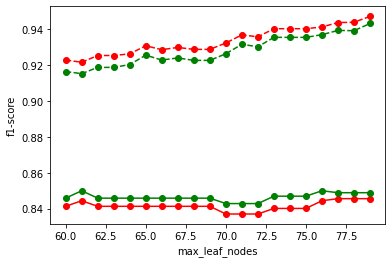

In [16]:
# Tuning max_leaf_nodes
start = 60
k = 80
step = 1
scores_val_0 = []
scores_val_1 = []
scores_train_0 = []
scores_train_1 = []

for i in range(start,k,step):
    rand_for = RandomForestClassifier(n_estimators = 19, max_depth = 19, max_leaf_nodes = i, random_state = 101)
    rand_for.fit(X_train, y_train)
    scores_val_0.append(classification_report(y_val, rand_for.predict(X_val), output_dict = True)['0']['f1-score'])
    scores_val_1.append(classification_report(y_val, rand_for.predict(X_val), output_dict = True)['1']['f1-score'])
    scores_train_0.append(classification_report(y_train, rand_for.predict(X_train), output_dict = True)['0']['f1-score'])
    scores_train_1.append(classification_report(y_train, rand_for.predict(X_train), output_dict = True)['1']['f1-score'])
    
plt.plot(list(range(start,k,step)), scores_val_0, 'r-o', label = 'val_0')
plt.plot(list(range(start,k,step)), scores_val_1, 'g-o', label = 'val_1')
plt.plot(list(range(start,k,step)), scores_train_0, 'r--o', label = 'train_0')
plt.plot(list(range(start,k,step)), scores_train_1, 'g--o', label = 'train_1')
plt.xlabel('max_leaf_nodes')
plt.ylabel('f1-score')
# max_leaf_nodes = 70

In [17]:
# Random Forest Classifier Results
rand_for = RandomForestClassifier(n_estimators = 19, max_depth = 19, max_leaf_nodes = 70, random_state = 101)
rand_for.fit(X_train, y_train)
print(classification_report(y_val, rand_for.predict(X_val)))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       134
           1       0.85      0.84      0.84       141

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



## MLP Classifier

In [18]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 101)
mlp.fit(X_train, y_train)
print(classification_report(y_val, mlp.predict(X_val)))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       134
           1       0.79      0.75      0.77       141

    accuracy                           0.77       275
   macro avg       0.77      0.77      0.77       275
weighted avg       0.77      0.77      0.77       275



Text(0, 0.5, 'f1-score')

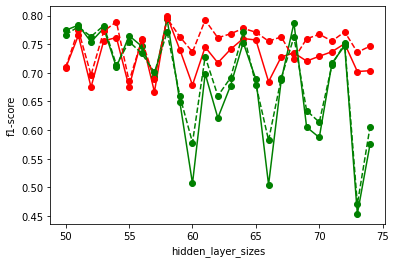

In [19]:
# Tuning Hidden layer sizes
start = 50
k = 75
step = 1
scores_val_0 = []
scores_val_1 = []
scores_train_0 = []
scores_train_1 = []

for i in range(start,k,step):
    mlp = MLPClassifier(hidden_layer_sizes = i, random_state = 101)
    mlp.fit(X_train, y_train)
    scores_val_0.append(classification_report(y_val, mlp.predict(X_val), output_dict = True)['0']['f1-score'])
    scores_val_1.append(classification_report(y_val, mlp.predict(X_val), output_dict = True)['1']['f1-score'])
    scores_train_0.append(classification_report(y_train, mlp.predict(X_train), output_dict = True)['0']['f1-score'])
    scores_train_1.append(classification_report(y_train, mlp.predict(X_train), output_dict = True)['1']['f1-score'])
    
plt.plot(list(range(start,k,step)), scores_val_0, 'r-o', label = 'val_0')
plt.plot(list(range(start,k,step)), scores_val_1, 'g-o', label = 'val_1')
plt.plot(list(range(start,k,step)), scores_train_0, 'r--o', label = 'train_0')
plt.plot(list(range(start,k,step)), scores_train_1, 'g--o', label = 'train_1')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('f1-score')
# hidden_layer_sizes = 71

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'f1-score')

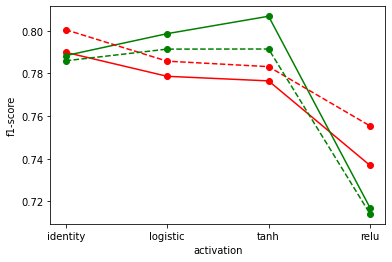

In [20]:
# Tuning for activation
scores_val_0 = []
scores_val_1 = []
scores_train_0 = []
scores_train_1 = []

for i in ['identity', 'logistic', 'tanh', 'relu']:
    mlp = MLPClassifier(hidden_layer_sizes = 71, activation = i, random_state = 101)
    mlp.fit(X_train, y_train)
    scores_val_0.append(classification_report(y_val, mlp.predict(X_val), output_dict = True)['0']['f1-score'])
    scores_val_1.append(classification_report(y_val, mlp.predict(X_val), output_dict = True)['1']['f1-score'])
    scores_train_0.append(classification_report(y_train, mlp.predict(X_train), output_dict = True)['0']['f1-score'])
    scores_train_1.append(classification_report(y_train, mlp.predict(X_train), output_dict = True)['1']['f1-score'])
    
plt.plot(['identity', 'logistic', 'tanh', 'relu'], scores_val_0, 'r-o', label = 'val_0')
plt.plot(['identity', 'logistic', 'tanh', 'relu'], scores_val_1, 'g-o', label = 'val_1')
plt.plot(['identity', 'logistic', 'tanh', 'relu'], scores_train_0, 'r--o', label = 'train_0')
plt.plot(['identity', 'logistic', 'tanh', 'relu'], scores_train_1, 'g--o', label = 'train_1')
plt.xlabel('activation')
plt.ylabel('f1-score')
# activation = tanh

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (201) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (202) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (203) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0, 0.5, 'f1-score')

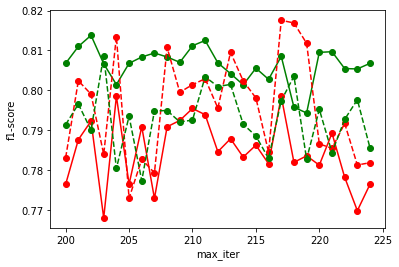

In [21]:
# Tuning max_iter
start = 200
k = 225
step = 1
scores_val_0 = []
scores_val_1 = []
scores_train_0 = []
scores_train_1 = []

for i in range(start,k,step):
    mlp = MLPClassifier(hidden_layer_sizes = 71, activation = 'tanh', max_iter = i, random_state = 101)
    mlp.fit(X_train, y_train)
    scores_val_0.append(classification_report(y_val, mlp.predict(X_val), output_dict = True)['0']['f1-score'])
    scores_val_1.append(classification_report(y_val, mlp.predict(X_val), output_dict = True)['1']['f1-score'])
    scores_train_0.append(classification_report(y_train, mlp.predict(X_train), output_dict = True)['0']['f1-score'])
    scores_train_1.append(classification_report(y_train, mlp.predict(X_train), output_dict = True)['1']['f1-score'])
    
plt.plot(list(range(start,k,step)), scores_val_0, 'r-o', label = 'val_0')
plt.plot(list(range(start,k,step)), scores_val_1, 'g-o', label = 'val_1')
plt.plot(list(range(start,k,step)), scores_train_0, 'r--o', label = 'train_0')
plt.plot(list(range(start,k,step)), scores_train_1, 'g--o', label = 'train_1')
plt.xlabel('max_iter')
plt.ylabel('f1-score')
# max_iter = 221

In [22]:
mlp = MLPClassifier(hidden_layer_sizes = 71, activation = 'tanh', max_iter = 221, random_state = 101)
mlp.fit(X_train, y_train)
print(classification_report(y_val, mlp.predict(X_val)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       134
           1       0.79      0.83      0.81       141

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.80      0.80      0.80       275



/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (221) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [23]:
rand_for = RandomForestClassifier(random_state = 101)
rand_for.fit(X_train, y_train)
print(classification_report(y_val, rand_for.predict(X_val)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       134
           1       0.85      0.87      0.86       141

    accuracy                           0.86       275
   macro avg       0.86      0.86      0.86       275
weighted avg       0.86      0.86      0.86       275



# Making Predictions

In [24]:
test_data = pd.read_csv('../input/titanic/test.csv')
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
test_data.drop('Cabin', axis = 1, inplace = True)
test_data['Age'].fillna(value = 1, inplace = True)
test_data['Fare'].fillna(value = test_data['Fare'].mean(), inplace = True)

In [26]:
test_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [27]:
# One hot encoding for Sex
dummies = pd.get_dummies(test_data['Sex'])
dummies.drop('female', axis = 1, inplace = True)
test_data = pd.concat([test_data.drop('Sex', axis = 1), dummies], axis = 1)
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,892,3,34.5,0,0,7.8292,Q,1
1,893,3,47.0,1,0,7.0000,S,0
2,894,2,62.0,0,0,9.6875,Q,1
3,895,3,27.0,0,0,8.6625,S,1
4,896,3,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,1305,3,1.0,0,0,8.0500,S,1
414,1306,1,39.0,0,0,108.9000,C,0
415,1307,3,38.5,0,0,7.2500,S,1
416,1308,3,1.0,0,0,8.0500,S,1


In [28]:
# For Embarked
dummies = pd.get_dummies(test_data['Embarked'])
dummies.drop('Q', axis = 1, inplace = True)
test_data = pd.concat([test_data.drop('Embarked', axis = 1), dummies], axis = 1)
test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,C,S
0,892,3,34.5,0,0,7.8292,1,0,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,0,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,1.0,0,0,8.0500,1,0,1
414,1306,1,39.0,0,0,108.9000,0,1,0
415,1307,3,38.5,0,0,7.2500,1,0,1
416,1308,3,1.0,0,0,8.0500,1,0,1


In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   male         418 non-null    uint8  
 7   C            418 non-null    uint8  
 8   S            418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [30]:
predictions = rand_for.predict(test_data)
predictions

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
predictions = pd.Series(predictions)
submission = pd.concat([test_data['PassengerId'], predictions], axis = 1)

In [32]:
submission.columns = ['PassengerId', 'Survived']
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [33]:
submission.to_csv('./submission.csv', index = False)